In [3]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from scripts.svo_extractor import findSVOs
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt
from scripts.topic_modelling import get_topics
import time

nlp = en_core_web_lg.load()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
def create_graph(final_nodes, cnt, colors):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = final_nodes[i][0]
        ent2 = final_nodes[i][2]
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize = (size, size))
        edge_labels = dict([((u, v, ), edge[d['weight']]) for u, v, d in G.edges(data = True)])
        pos = nx.spring_layout(G, k = 0.8)
        nx.draw(G, with_labels = True, node_color = colors[cnt], node_size=5000, edge_color='r', edge_cmap = plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 15)
        return G, edge_labels

Topic:  0
[('Judge Denise L. Cote of for', 'entered', 'a partial judgment against'), ('a adviser', 'registered')]
[('The complaint', 'alleges'), ('Hu', 'deceived', 'IIG clients'), ('the loans', 'purported'), ('the existent loans ,', 'including'), ('a agreement', 'forged')]
[('a bifurcated settlement', 'consent', 'Hu'), ('the provisions with monetary relief', 'charged'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount')]
[('the SEC', 'obtained', 'a final judgment on consent'), ('consent', 'enjoining', 'IIG'), ('consent', 'violating', 'the antifraud provisions of the federal securities laws'), ('consent', 'pay', 'IIG'), ('consent', 'pay', 'more than $ 35 million in disgorgement interest'), ('consent', 'pay', 'more than $ 35 million in')]
Finalnodes:  [('Judge Denise L. Cote of for', 'entered', 'a partial judgment against'), ('Hu', 'deceived', 'IIG clients'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amoun

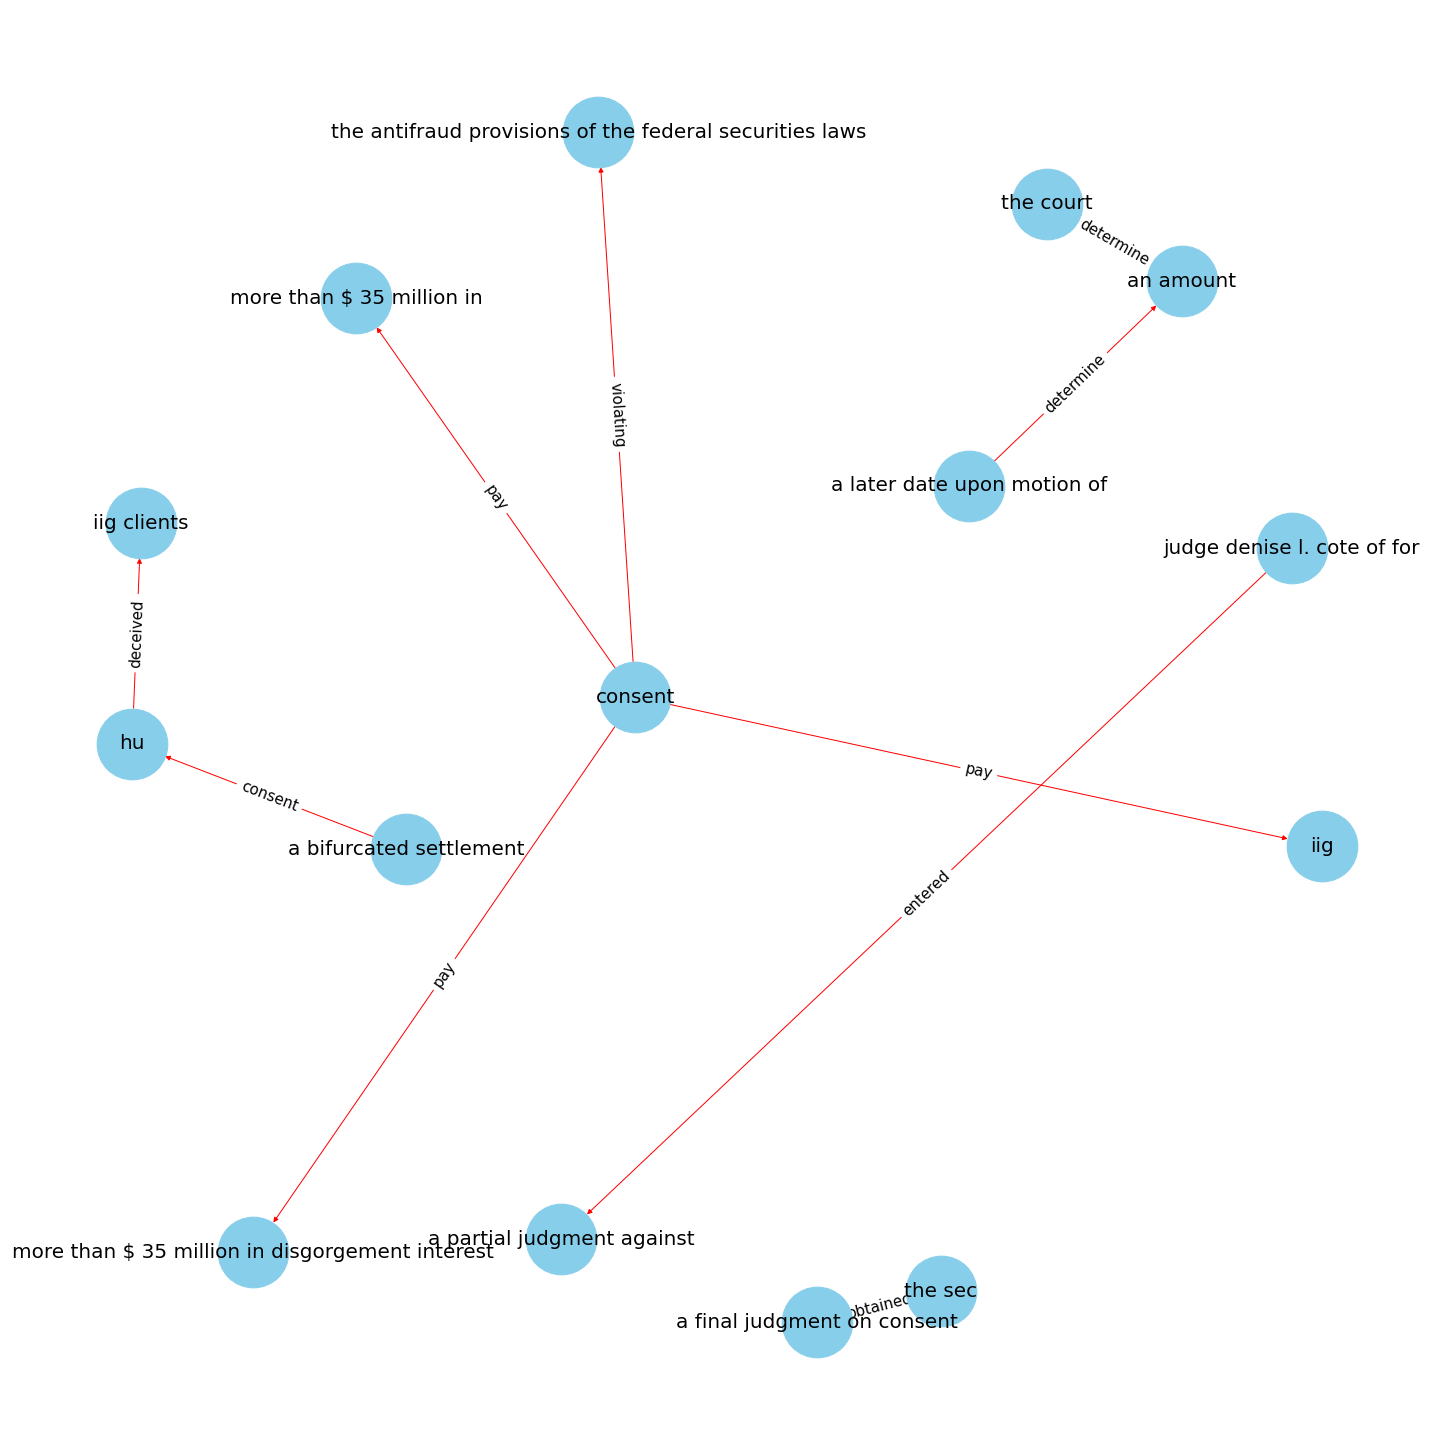

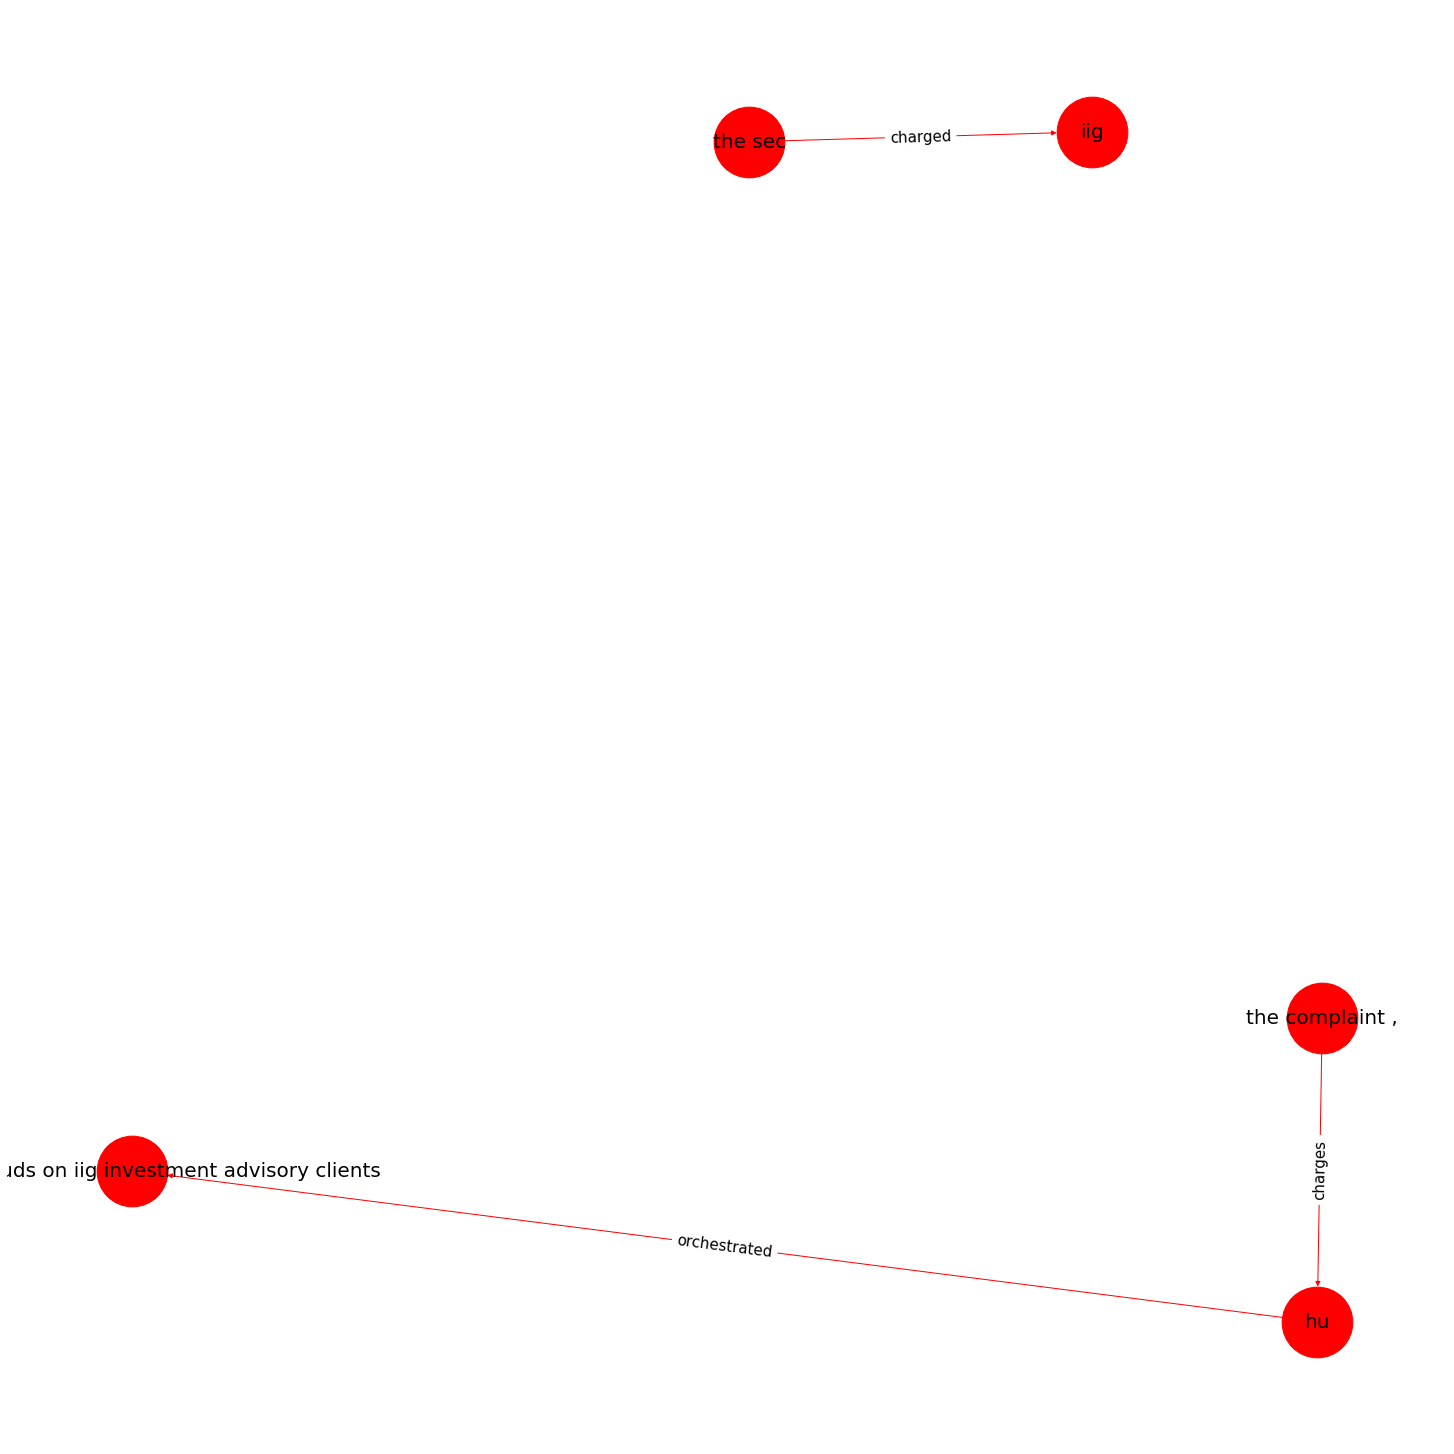

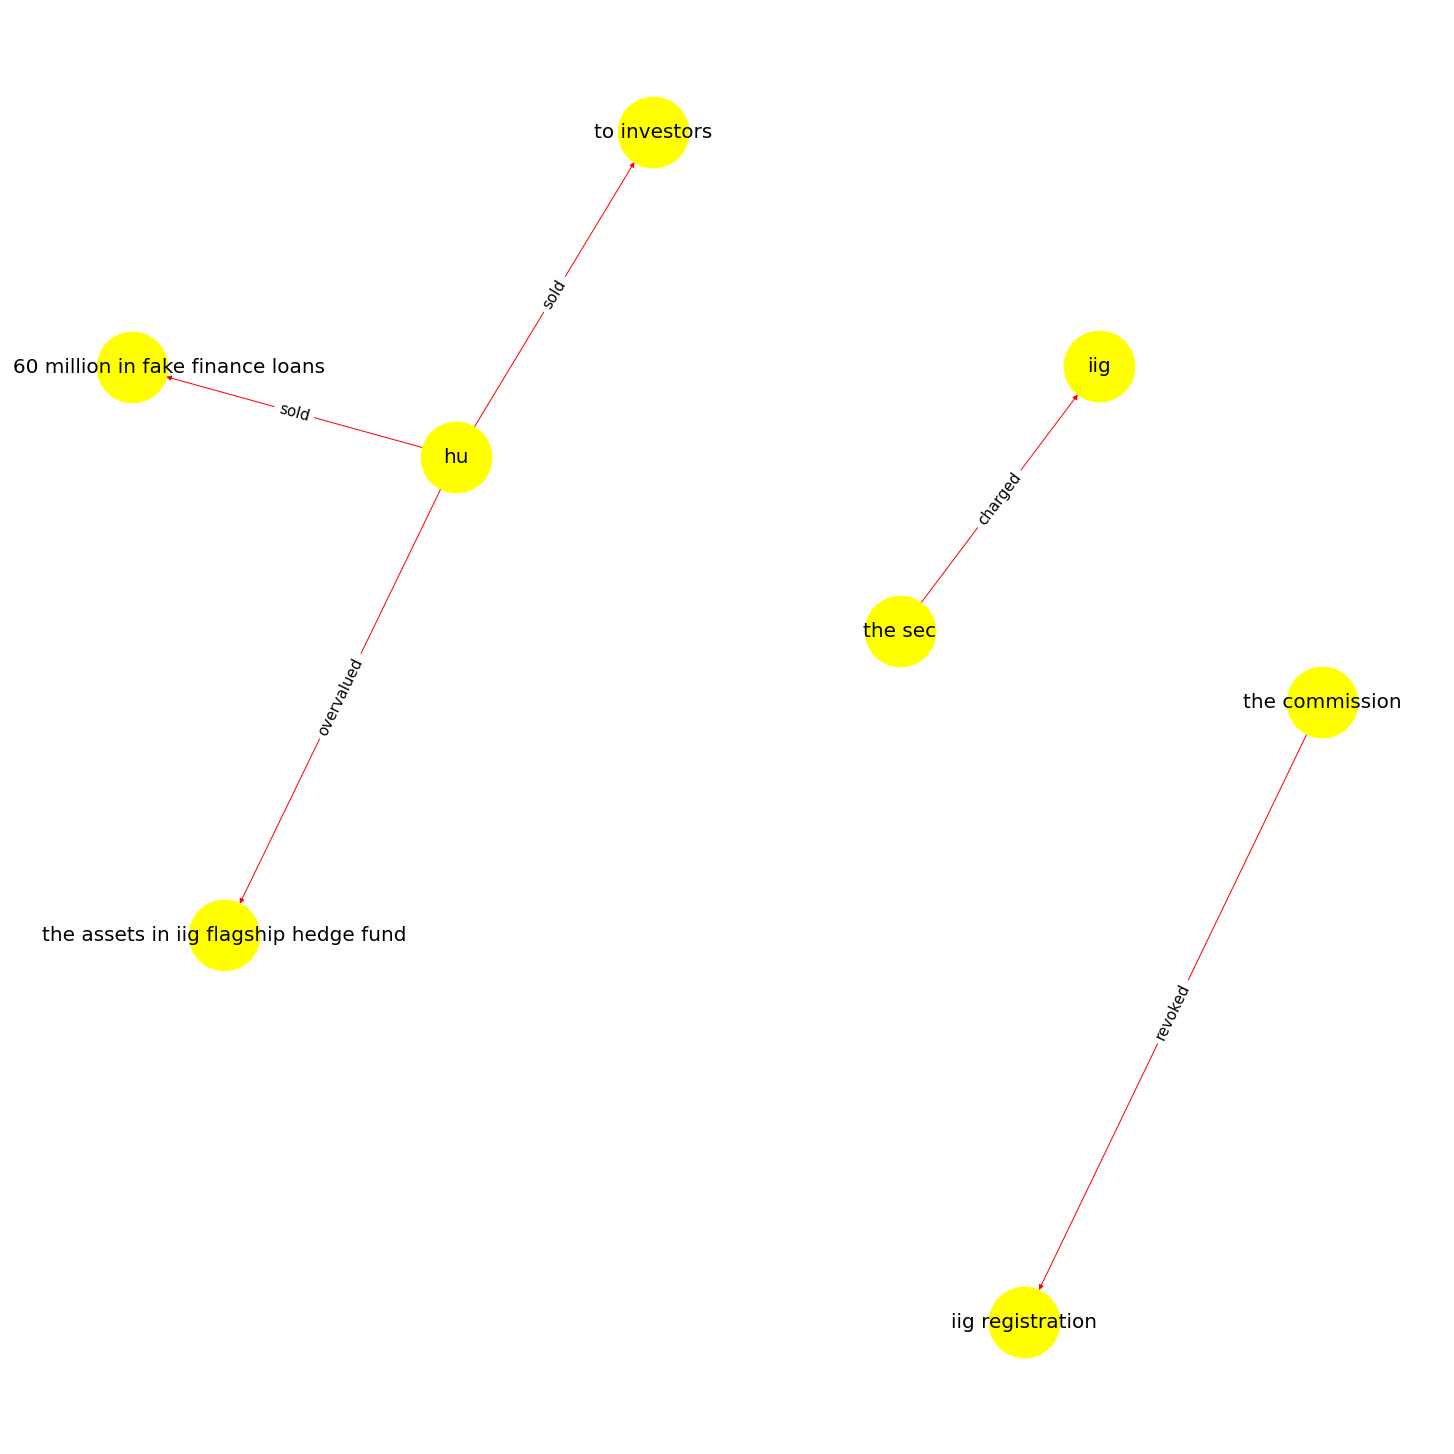

In [8]:
colors = ['skyblue', 'red', 'yellow']
no_of_topics = 3
topics = get_topics('data/docs/text3.txt', no_of_topics)
cnt=-1

graphs = []
for i in topics:
    print('Topic: ', i)
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        print(svos)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    print('Finalnodes: ', final_nodes)

    graphs.append(create_graph(final_nodes, cnt, colors))
    name = str(time.time())
    plt.savefig('./results/images/tm_graph.png')

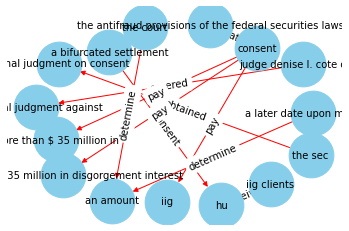

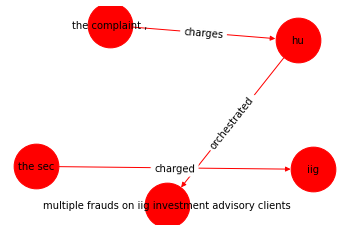

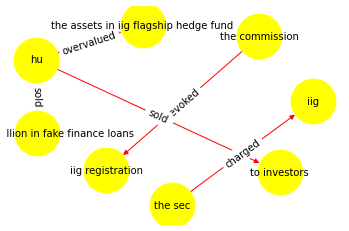

In [9]:
i = 0
for graph in graphs:
    ax = plt.subplots()
    pos = nx.spring_layout(graph[0], k = 10)
    nx.draw(graph[0], with_labels = True, node_color = colors[i], node_size = 2000, edge_color = 'r', edge_cmap = plt.cm.Blues, pos = pos, font_size = 10, ax = None)
    nx.draw_networkx_edge_labels(graph[0], pos, edge_labels = graph[1], font_size = 10)
    i = i + 1